<a href="https://colab.research.google.com/github/AdithyaRai/RetailSense/blob/main/notebooks/RetailSense.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Walmart.csv')
print("Data Loaded! Here are the first 5 rows:")
df.head()

Data Loaded! Here are the first 5 rows:


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [6]:
# Convert Date column to actual datetime objects
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Extract time-based features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week
df['DayOfWeek'] = df['Date'].dt.dayofweek

# Create a "Season" feature (Recruiters love domain-specific logic)
def get_season(month):
    if month in [12, 1, 2]: return 'Winter'
    elif month in [3, 4, 5]: return 'Spring'
    elif month in [6, 7, 8]: return 'Summer'
    else: return 'Fall'

df['Season'] = df['Month'].apply(get_season)

# One-hot encode the Season (convert text to numbers)
df = pd.get_dummies(df, columns=['Season'])

print("Feature Engineering Complete. New columns added!")
df.head()

Feature Engineering Complete. New columns added!


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,DayOfWeek,Season_Fall,Season_Spring,Season_Summer,Season_Winter
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,4,False,False,False,True
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,6,4,False,False,False,True
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7,4,False,False,False,True
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8,4,False,False,False,True
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,9,4,False,True,False,False


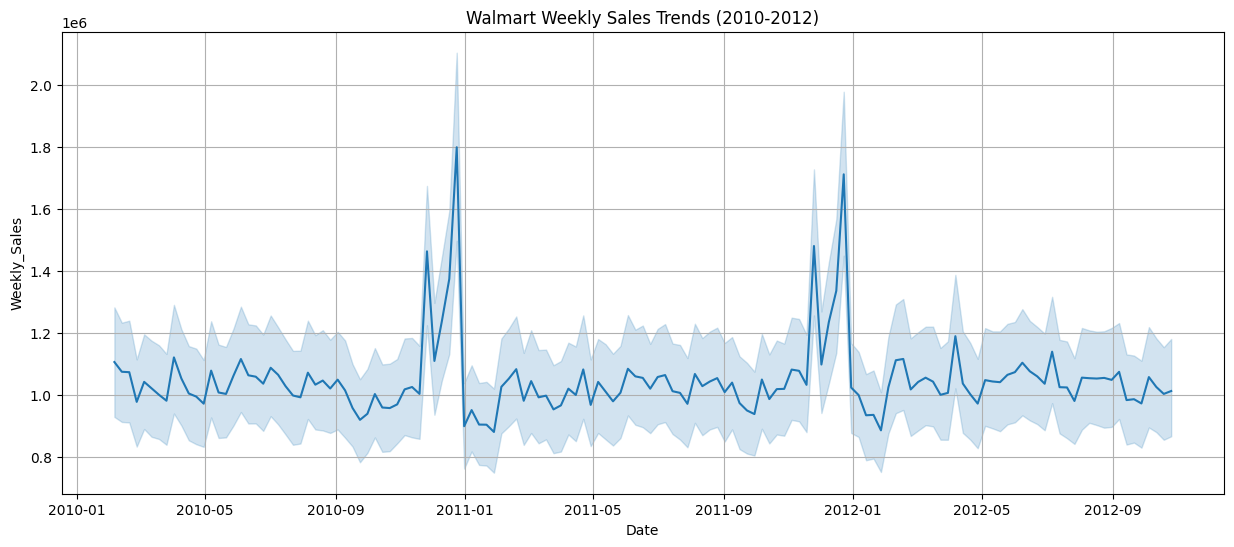

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,6))
sns.lineplot(data=df, x='Date', y='Weekly_Sales')
plt.title('Walmart Weekly Sales Trends (2010-2012)')
plt.grid(True)
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

# 1. Select the columns that help predict sales (Features)
# We drop 'Weekly_Sales' (target) and 'Date' (already extracted features from it)
X = df.drop(['Weekly_Sales', 'Date'], axis=1)

# 2. Select the column we want to predict (Target)
y = df['Weekly_Sales']

# 3. Split data: 80% for training, 20% for testing
# This ensures the model is tested on data it has NEVER seen before.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (5148, 14)
Testing set size: (1287, 14)


In [9]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, r2_score

# 1. Initialize the model
# n_estimators=100 means we are building 100 small decision trees
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# 2. Train the model
model.fit(X_train, y_train)

# 3. Make predictions on the test set
predictions = model.predict(X_test)

print("Model Training Complete!")

Model Training Complete!


Mean Absolute Error: $67,388.43
R-squared Score: 0.9672


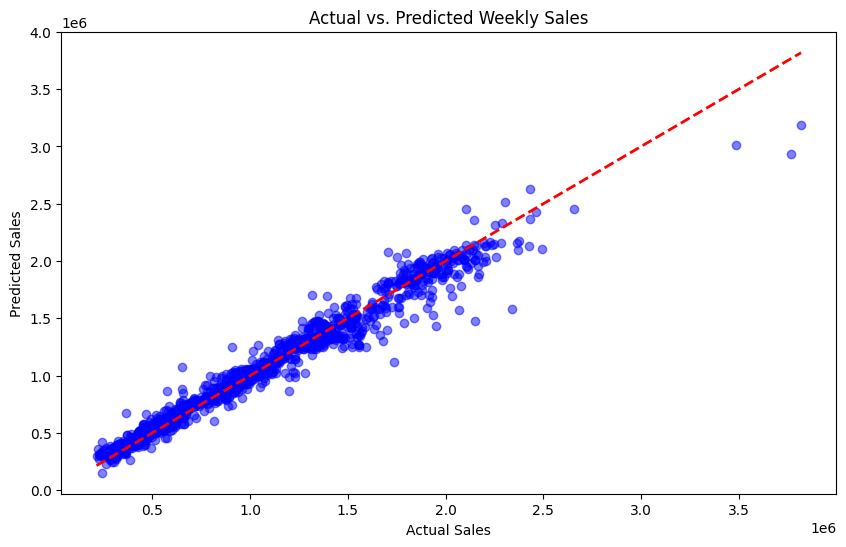

In [10]:
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Absolute Error: ${mae:,.2f}")
print(f"R-squared Score: {r2:.4f}")

# Visualize Actual vs Predicted
plt.figure(figsize=(10,6))
plt.scatter(y_test, predictions, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Weekly Sales')
plt.show()

In [11]:
!pip freeze > requirements.txt